In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

In [4]:
df = pd.read_csv('email_campaign_data.csv')

In [5]:
summary_stats = df.describe()
print(summary_stats)

            opened      clicked
count  1000.000000  1000.000000
mean      0.704000     0.301000
std       0.456719     0.458922
min       0.000000     0.000000
25%       0.000000     0.000000
50%       1.000000     0.000000
75%       1.000000     1.000000
max       1.000000     1.000000


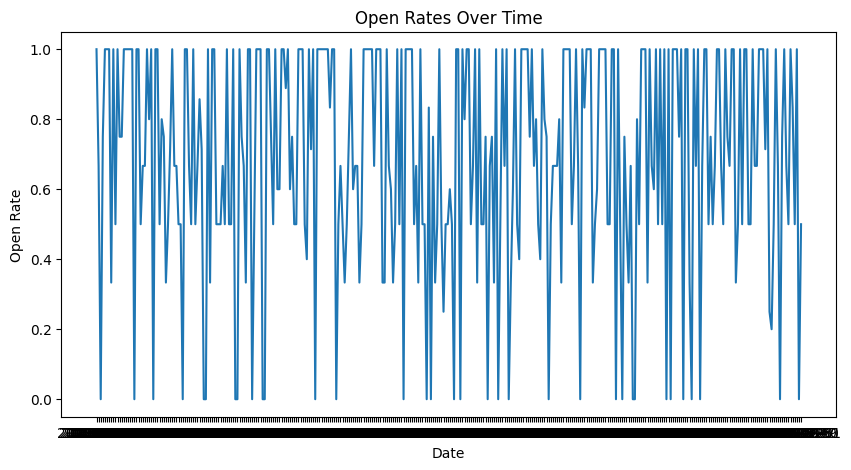

In [6]:
open_rates = df.groupby('date')['opened'].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(data=open_rates)
plt.title('Open Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Open Rate')
plt.show()

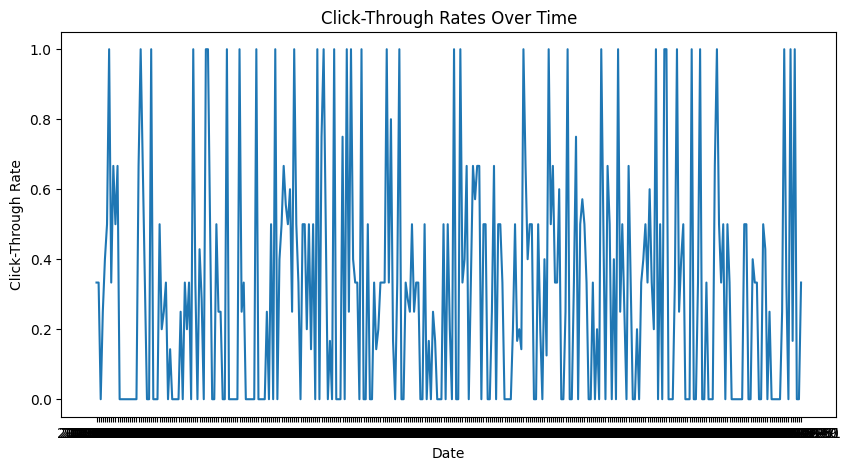

In [7]:
ctr = df.groupby('date')['clicked'].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(data=ctr)
plt.title('Click-Through Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Click-Through Rate')
plt.show()


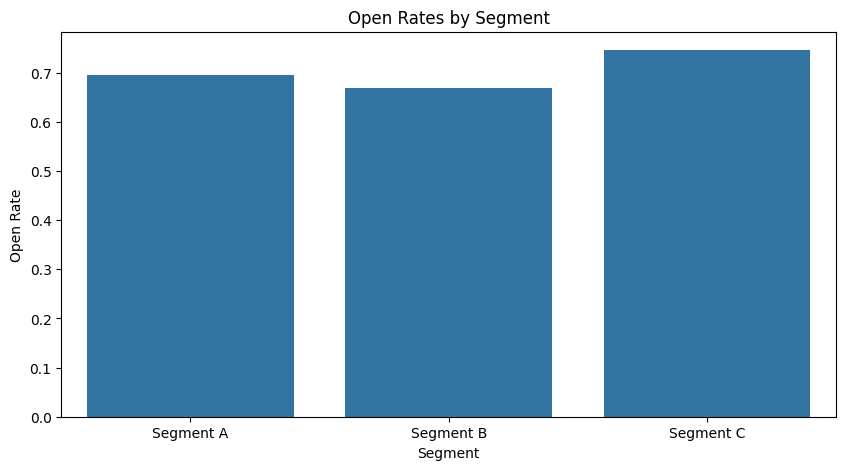

In [8]:
open_rates_segment = df.groupby('segment')['opened'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(data=open_rates_segment, x='segment', y='opened')
plt.title('Open Rates by Segment')
plt.xlabel('Segment')
plt.ylabel('Open Rate')
plt.show()


In [9]:
with pd.ExcelWriter('email_campaign_report.xlsx', engine='openpyxl') as writer:
    df.to_excel(writer, sheet_name='Raw Data', index=False)
    summary_stats.to_excel(writer, sheet_name='Summary Statistics')
    open_rates.to_frame(name='Open Rates').to_excel(writer, sheet_name='Open Rates Over Time')
    ctr.to_frame(name='Click-Through Rates').to_excel(writer, sheet_name='Click-Through Rates Over Time')
    open_rates_segment.to_excel(writer, sheet_name='Open Rates by Segment', index=False)
